## Communicate Data Findings  (Loan Data from Prosper)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#sd">Storing Data</a></li>
<li><a href="#visualization">Visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='wrangling'></a>
## Data Wrangling

## General Properties

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

%matplotlib inline

In [44]:
df = pd.read_csv('prosperLoanData.csv')

In [45]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.shape

(113937, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [8]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


<a id='Cleaning'></a>
## Data Cleaning

In [9]:
df.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [10]:
df.isnull()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.duplicated().sum()

0

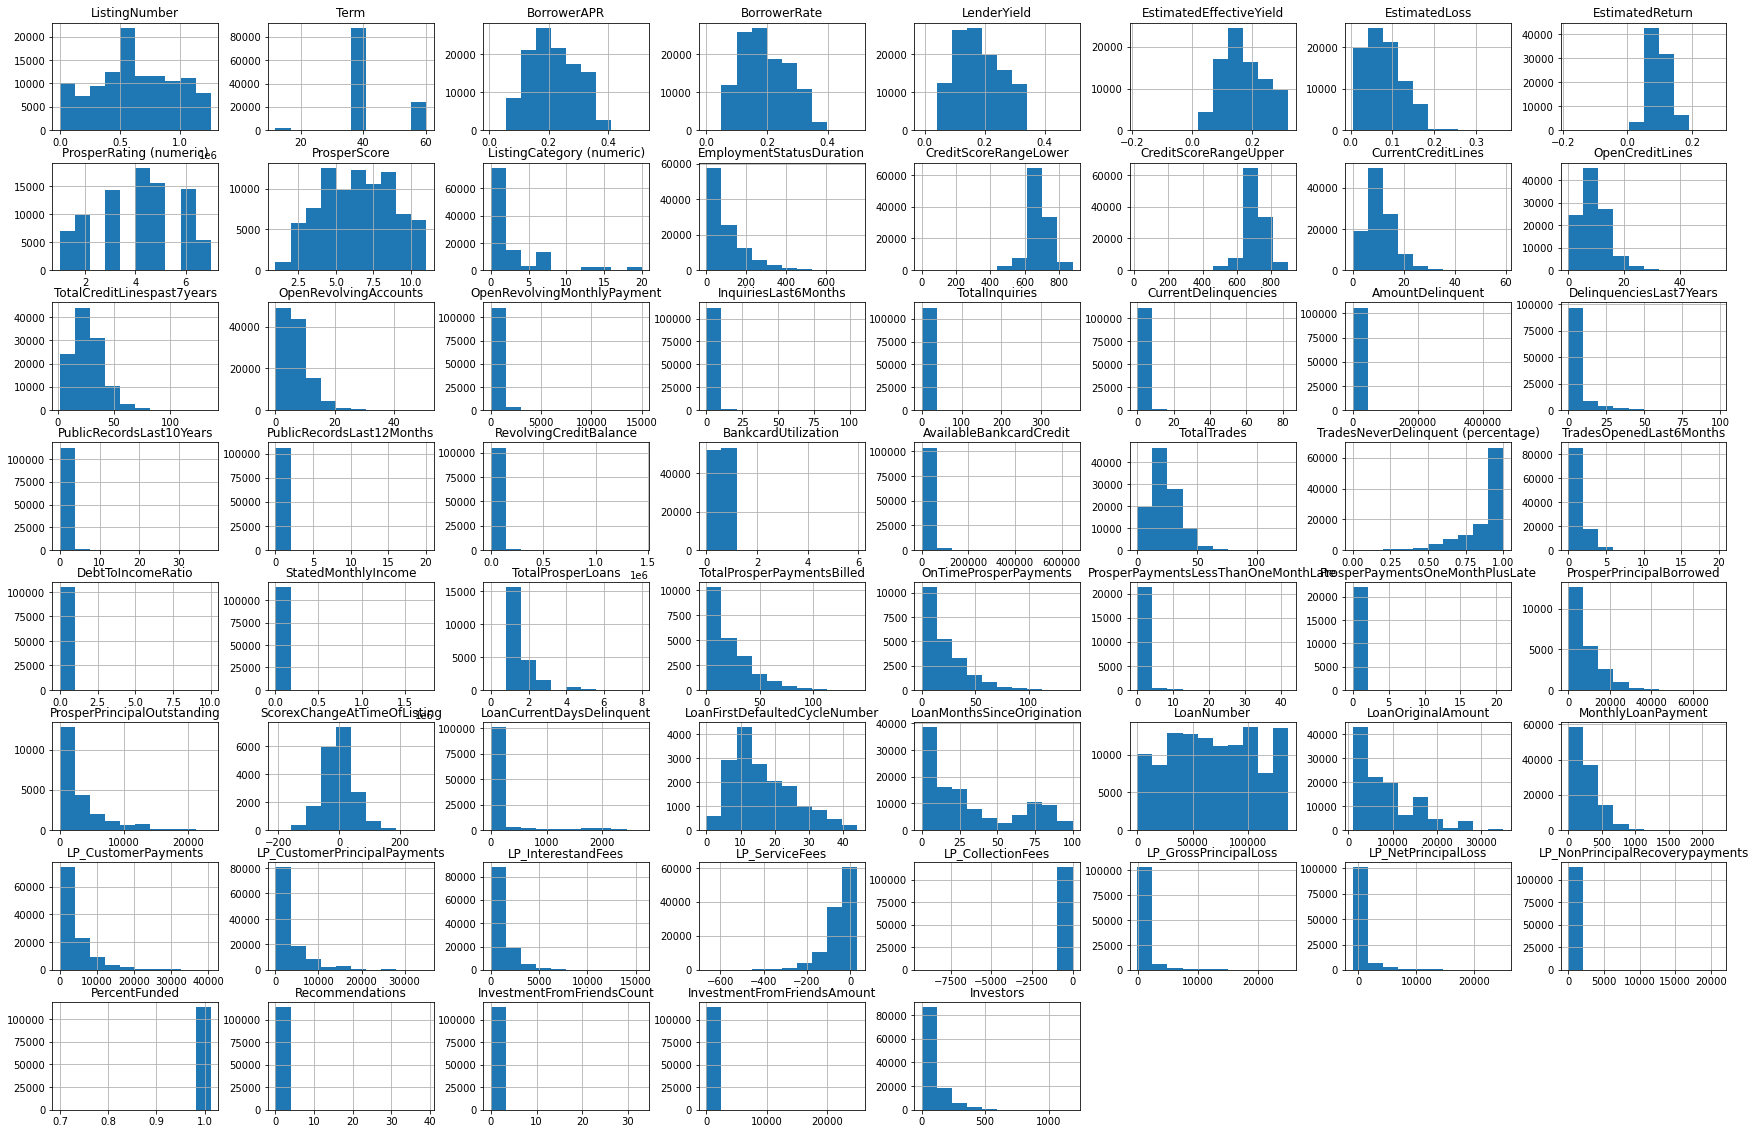

In [19]:
df.hist(figsize=(30,20));

In [46]:
Loan = df
drop_columns = ['ListingKey','ListingNumber','ListingCreationDate','CreditGrade','ClosedDate','BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'BorrowerState', 'Occupation', 'EmploymentStatusDuration', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'CurrentDelinquencies']
Loan.drop(drop_columns, axis=1,inplace = True)

<a id='sd'></a>
## Storing Data

In [47]:
Loan.to_csv('Loan_Data.csv',index=False)

In [48]:
Loan.head()

,Term,LoanStatus,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,TotalTrades,IncomeRange,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
0,36,Completed,0.16516,NaN,NaN,NaN,0,Self-employed,True,True,11.0,"$25,000-49,999",0,9425,330.43,1.0,258
1,36,Current,0.12016,6.0,A,7.0,2,Employed,False,False,29.0,"$50,000-74,999",0,10000,318.93,1.0,1
2,36,Completed,0.28269,NaN,NaN,NaN,0,Not available,False,True,NaN,Not displayed,0,3001,123.32,1.0,41
3,36,Current,0.12528,6.0,A,9.0,16,Employed,True,False,26.0,"$25,000-49,999",0,10000,321.45,1.0,158
4,36,Current,0.24614,3.0,D,4.0,2,Employed,True,False,39.0,"$100,000+",0,15000,563.97,1.0,20


<a id='visualization'></a>
## Visualization

### What is the maximum loan term in months?
The largest proportion of borrowers prefer 36 months

In [23]:
## Term, The length of the loan expressed in months.

Loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

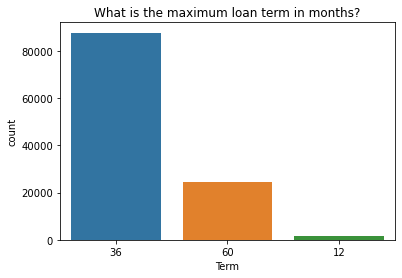

In [24]:
sb.countplot(data=Loan, x='Term', order=[36,60,12])
plt.title("What is the maximum loan term in months?");

### What is the percentage of current loan status?
Loan status is 56,576 currently in progress

In [25]:
## LoanStatus, The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
Loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

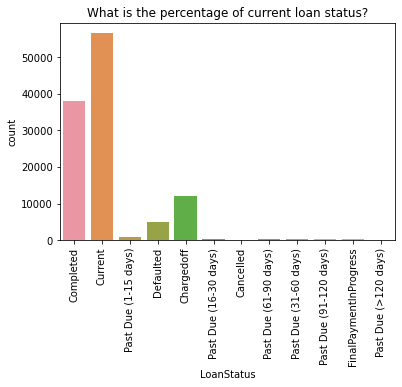

In [26]:
sb.countplot(data=Loan, x='LoanStatus')
plt.title("What is the percentage of current loan status?");
plt.xticks(rotation=90);

### What is the ratio of Percentage Rate (APR) for the loan?
The borrower's highest APR for 3,672 loans equals 0.35797%.

In [27]:
## BorrowerAPR, The Borrower's Annual Percentage Rate (APR) for the loan.
Loan.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64

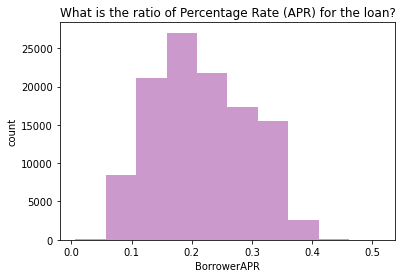

In [28]:
plt.hist(data = Loan, x = 'BorrowerAPR', color = 'purple', alpha=0.4)
plt.title("What is the ratio of Percentage Rate (APR) for the loan?")
plt.xlabel("BorrowerAPR")
plt.ylabel("count");

### What is the classification of loans based on prosper rating number?
Most loans fall into the Prosper Rating (numeric) in 4 rating 

In [29]:
## ProsperRating (numeric), The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

Loan.rename(columns={'ProsperRating (numeric)':'ProsperRatingN'}, inplace=True)
Loan.head()

,Term,LoanStatus,BorrowerAPR,ProsperRatingN,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,TotalTrades,IncomeRange,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
0,36,Completed,0.16516,NaN,NaN,NaN,0,Self-employed,True,True,11.0,"$25,000-49,999",0,9425,330.43,1.0,258
1,36,Current,0.12016,6.0,A,7.0,2,Employed,False,False,29.0,"$50,000-74,999",0,10000,318.93,1.0,1
2,36,Completed,0.28269,NaN,NaN,NaN,0,Not available,False,True,NaN,Not displayed,0,3001,123.32,1.0,41
3,36,Current,0.12528,6.0,A,9.0,16,Employed,True,False,26.0,"$25,000-49,999",0,10000,321.45,1.0,158
4,36,Current,0.24614,3.0,D,4.0,2,Employed,True,False,39.0,"$100,000+",0,15000,563.97,1.0,20


In [30]:
Loan.ProsperRatingN.value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRatingN, dtype: int64

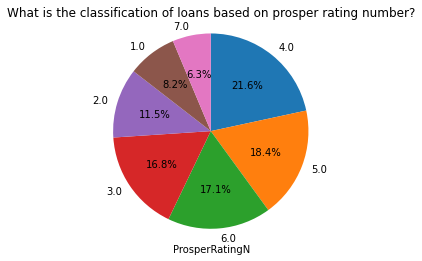

In [31]:
ProsperRatingN = Loan['ProsperRatingN'].value_counts()
plt.pie(ProsperRatingN, labels = ProsperRatingN.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title("What is the classification of loans based on prosper rating number?")
plt.xlabel("ProsperRatingN")
plt.axis('square');

### The classification of loans based on Literal prosper rating?
Most loans fall into the Prosper Rating (literal) in C Rating 

In [32]:
## ProsperRating (Alpha), The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

Loan.rename(columns={'ProsperRating (Alpha)':'ProsperRatingA'}, inplace=True)
Loan.head()

,Term,LoanStatus,BorrowerAPR,ProsperRatingN,ProsperRatingA,ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,TotalTrades,IncomeRange,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
0,36,Completed,0.16516,NaN,NaN,NaN,0,Self-employed,True,True,11.0,"$25,000-49,999",0,9425,330.43,1.0,258
1,36,Current,0.12016,6.0,A,7.0,2,Employed,False,False,29.0,"$50,000-74,999",0,10000,318.93,1.0,1
2,36,Completed,0.28269,NaN,NaN,NaN,0,Not available,False,True,NaN,Not displayed,0,3001,123.32,1.0,41
3,36,Current,0.12528,6.0,A,9.0,16,Employed,True,False,26.0,"$25,000-49,999",0,10000,321.45,1.0,158
4,36,Current,0.24614,3.0,D,4.0,2,Employed,True,False,39.0,"$100,000+",0,15000,563.97,1.0,20


In [33]:
Loan.ProsperRatingA.value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRatingA, dtype: int64

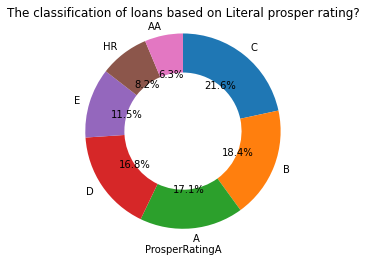

In [34]:
ProsperRatingA_counts = Loan['ProsperRatingA'].value_counts()

plt.pie(ProsperRatingA_counts, labels = ProsperRatingA_counts.index, startangle = 90, autopct='%1.1f%%',
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title("The classification of loans based on Literal prosper rating?")
plt.xlabel("ProsperRatingA")
plt.axis('square');

### What is the percentage of loans at risk based on Prosper Score?
The largest percentage of loans are located at 4 score

In [35]:
## ProsperScore, A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

Loan.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

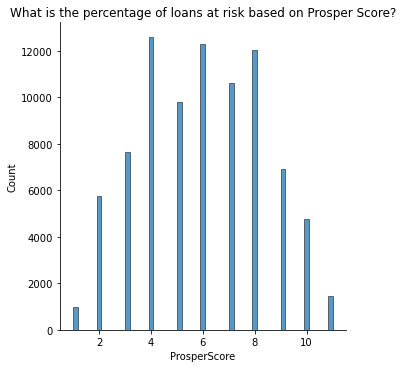

In [36]:
sb.displot(Loan['ProsperScore'], kind='hist')
plt.title("What is the percentage of loans at risk based on Prosper Score?");

### What is the most category of the listing that the borrower selected?
The most selected listing category of loans is debt consolidation

In [49]:
## ListingCategory, The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

Loan.rename(columns={'ListingCategory (numeric)':'ListingCategoryN'}, inplace=True)
Loan.head()

,Term,LoanStatus,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategoryN,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,TotalTrades,IncomeRange,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
0,36,Completed,0.16516,NaN,NaN,NaN,0,Self-employed,True,True,11.0,"$25,000-49,999",0,9425,330.43,1.0,258
1,36,Current,0.12016,6.0,A,7.0,2,Employed,False,False,29.0,"$50,000-74,999",0,10000,318.93,1.0,1
2,36,Completed,0.28269,NaN,NaN,NaN,0,Not available,False,True,NaN,Not displayed,0,3001,123.32,1.0,41
3,36,Current,0.12528,6.0,A,9.0,16,Employed,True,False,26.0,"$25,000-49,999",0,10000,321.45,1.0,158
4,36,Current,0.24614,3.0,D,4.0,2,Employed,True,False,39.0,"$100,000+",0,15000,563.97,1.0,20


In [38]:
Loan.ListingCategoryN.value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategoryN, dtype: int64

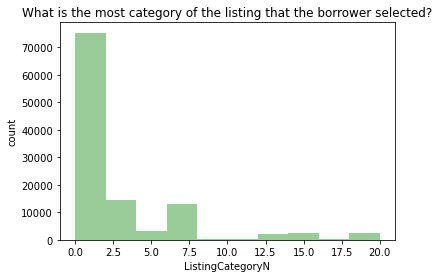

In [39]:
plt.hist(data = Loan, x = 'ListingCategoryN', color = 'green', alpha=0.4)
plt.title("What is the most category of the listing that the borrower selected?")
plt.xlabel("ListingCategoryN")
plt.ylabel("count");

### What are the employment statuses of borrowers?
largest percentage employment status for the borrowers is for employees

In [40]:
Loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

<Figure size 432x288 with 0 Axes>

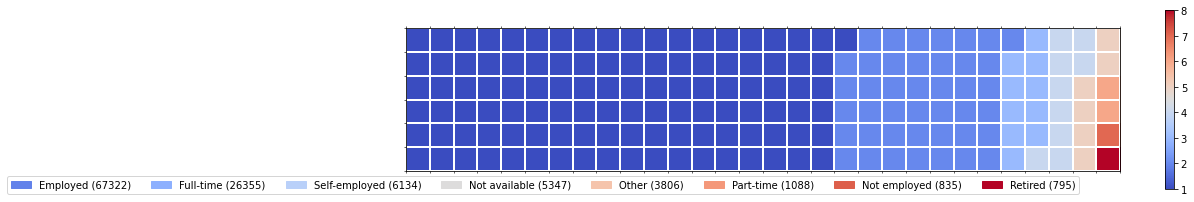

In [41]:
import matplotlib as mpl
import matplotlib.patches as mpatches

# Make a dataframe with categories and values
Loan = pd.DataFrame({ 'catagories': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired'], 
                    'values': [67322, 26355, 6134, 5347, 3806, 1088, 835, 795] })

# Define a desired height and width.
waffle_plot_width = 30
waffle_plot_height = 6

classes = Loan['catagories']
values = Loan['values']

def waffle_plot(classes, values, height, width, colormap):

    # Compute the portion of the total assigned to each class.
    class_portion = [float(v)/sum(values) for v in values]

    total_tiles = width * height
    tiles_per_class = [round(p*total_tiles) for p in class_portion]

    plot_matrix = np.zeros((height, width))

    class_index = 0
    tile_index = 0

    for col in range(waffle_plot_width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_class[0:class_index]):

                class_index += 1       

            plot_matrix[row, col] = class_index

    # Create a new figure
    fig = plt.figure()

    plt.matshow(plot_matrix, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Add the legend.
    legend_handles = []
    for i, c in enumerate(classes):
        lable_str = c + " (" + str(values[i]) + ")"
        color_val = colormap(float(i+1)/len(classes))
        legend_handles.append(mpatches.Patch(color=color_val, label=lable_str))

    plt.legend(handles=legend_handles, loc=1, ncol=len(classes),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    plt.xticks([])
    plt.yticks([])

# Call the plotting function.
waffle_plot(classes, values, waffle_plot_height, waffle_plot_width,
            plt.cm.coolwarm);

### What number of Owning and Non-Home owning Borrowers?
The majority of borrowers own their own homes

In [50]:
## Is Borrower Home owner, A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

Loan.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

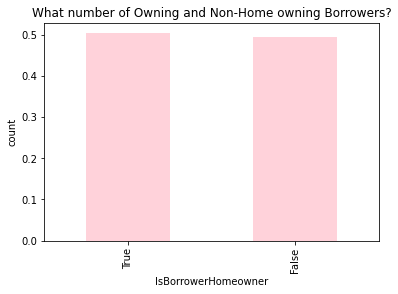

In [51]:
Loan['IsBorrowerHomeowner'].value_counts('True', 'False').plot(kind='bar', color= 'pink', alpha=0.7)
plt.title("What number of Owning and Non-Home owning Borrowers?")
plt.xlabel("IsBorrowerHomeowner")
plt.ylabel("count");

### Proportion of borrowers participating in groups or not?
The majority of borrowers are currently in the group

In [52]:
## Currently In Group, Specifies whether or not the Borrower was in a group at the time the listing was created.

Loan.CurrentlyInGroup.value_counts()

False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64

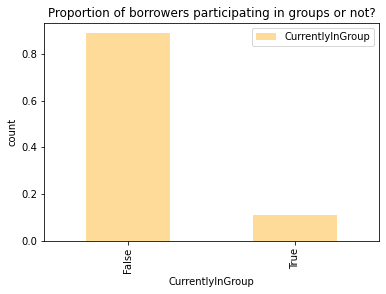

In [53]:
Loan['CurrentlyInGroup'].value_counts('True', 'False').plot(kind='bar', color='orange', alpha=0.4)
plt.title("Proportion of borrowers participating in groups or not?")
plt.xlabel("CurrentlyInGroup")
plt.ylabel("count")
plt.legend();

### What is the income range of borrowers?
The highest percentage of borrowers' income ranges between $25,000-49,999

In [54]:
## IncomeRange, The income range of the borrower at the time the listing was created.

Loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

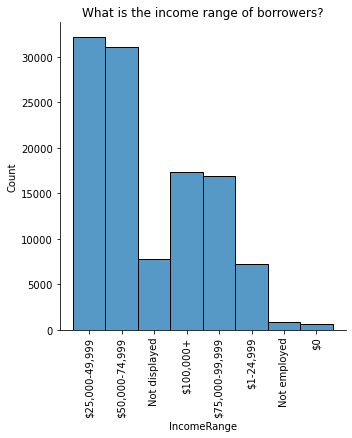

In [55]:
sb.displot(Loan['IncomeRange'], kind='hist')
plt.title("What is the income range of borrowers?")
plt.xticks(rotation=90);

### What is the total number of days in which the borrower is late in payment?
The average days for borrowers late for payment was 152.81 and 293 borrowers were late for 121 days.

In [56]:
## LoanCurrentDaysDelinquent, The number of days delinquent. 

Loan.LoanCurrentDaysDelinquent.mean()

152.81653896451547

In [57]:
Loan.LoanCurrentDaysDelinquent.value_counts()

0       94860
121       293
10        192
4          77
11         62
        ...  
582         1
1099        1
2555        1
787         1
1081        1
Name: LoanCurrentDaysDelinquent, Length: 2411, dtype: int64

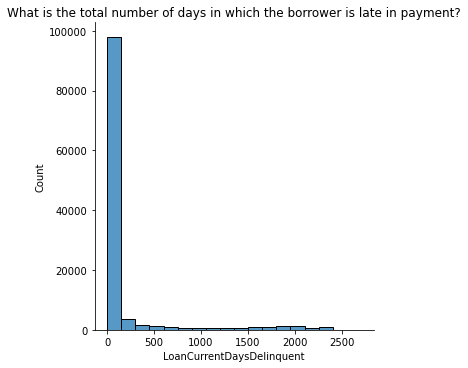

In [58]:
sb.displot(Loan['LoanCurrentDaysDelinquent'], kind='hist')
plt.title("What is the total number of days in which the borrower is late in payment?");

### What is the total amount borrowed?
The highest amount borrowed is 35,000 and the lowest amount is 1,000.

In [59]:
## LoanOriginalAmount, The origination amount of the loan.
Loan.LoanOriginalAmount.max()

35000

In [60]:
Loan.LoanOriginalAmount.mean()

8337.013849759078

In [61]:
Loan.LoanOriginalAmount.min()

1000

In [62]:
Loan.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

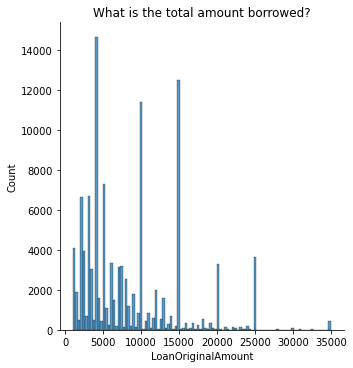

In [63]:
sb.displot(Loan['LoanOriginalAmount'], kind='hist')
plt.title("What is the total amount borrowed?");

### What is the percentage financed for the loan?
It was found that 113067 loans were financed from 113,937 loans

In [64]:
## PercentFunded, Percent the listing was funded.
Loan.PercentFunded.mean()

0.9985835233506232

In [65]:
Loan.PercentFunded.value_counts()

1.0000    113067
0.9998         5
0.7000         4
0.8087         4
0.7803         3
           ...  
0.8972         1
0.8237         1
0.9113         1
0.8333         1
0.7067         1
Name: PercentFunded, Length: 719, dtype: int64

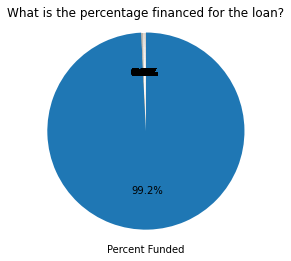

In [66]:
PercentFunded = Loan['PercentFunded'].value_counts()

plt.pie(PercentFunded, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title("What is the percentage financed for the loan?")
plt.xlabel("Percent Funded")
plt.axis('square');

### How many investors have financed the loan?
A one loan was supported by 27,814 investors

In [67]:
## Investors, The number of investors that funded the loan.

Loan.Investors.value_counts()

1      27814
2       1386
3        991
4        827
5        753
       ...  
665        1
634        1
555        1
752        1
754        1
Name: Investors, Length: 751, dtype: int64

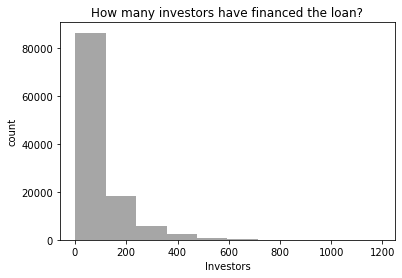

In [68]:
plt.hist(data = Loan, x = 'Investors', color = 'gray', alpha=0.7)
plt.title("How many investors have financed the loan?")
plt.xlabel("Investors")
plt.ylabel("count");

### What is the relationship between income and loan amount?
There was a direct relationship between income and the amount of borrowing. The higher the income, the greater the amount of borrowing. 

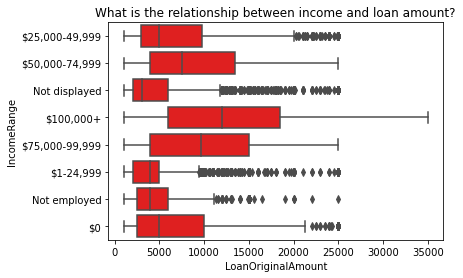

In [69]:
sb.boxplot(data = Loan, y='IncomeRange', x='LoanOriginalAmount', color = 'red')
plt.title("What is the relationship between income and loan amount?")
plt.xlabel("LoanOriginalAmount")
plt.ylabel("IncomeRange");

### Is there a relationship between funding percentage and Prosper Score?
Loans with a high risk prosper score equal 1, the most loans funding

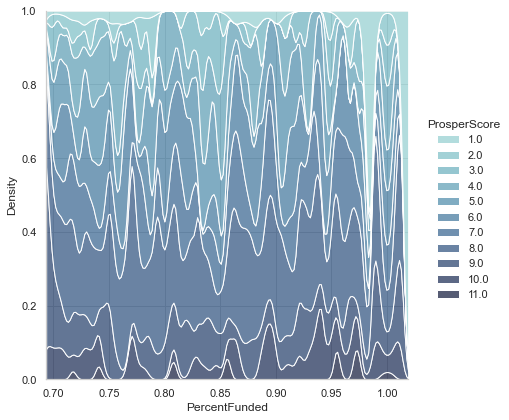

In [70]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Plot the distribution of Percent Funded, conditional on Prosper Score
sns.displot(
    data=Loan,
    x="PercentFunded", hue="ProsperScore", 
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25, hue=1,light=.75",
);

### What the Investment percentage based on Listing Category?
Comparison between Investment percentage based on listing category debt consolidation loans got the highest investment rate with more than 1200 investments

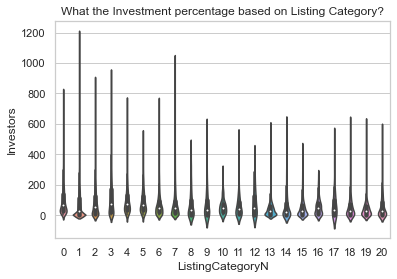

In [71]:
sb.violinplot(data=Loan, x='ListingCategoryN', y='Investors')
plt.title("What the Investment percentage based on Listing Category?");

### Is there a relationship between Employment Status and monthly loan payment status?
It was noted that the amount of the monthly payment depends on the job status of the borrower, as the employees are the most who paid monthly loans

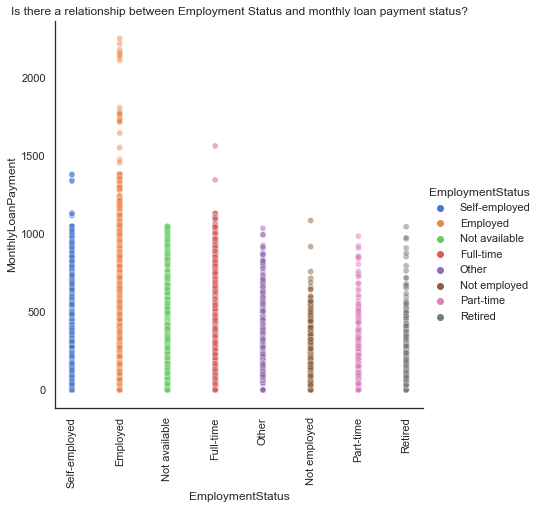

In [72]:
import seaborn as sns
sns.set_theme(style="white")

sns.relplot(x="EmploymentStatus", y="MonthlyLoanPayment", hue="EmploymentStatus",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=Loan)
plt.title("Is there a relationship between Employment Status and monthly loan payment status?")
plt.xticks(rotation=90);

### What is the relationship of Income Range to the Listing Category? 
The comparison between both income and the listing category is that the highest percentage of non-employees are interested in Medical/Dental, while those whose income reaches 25000 are in green loans

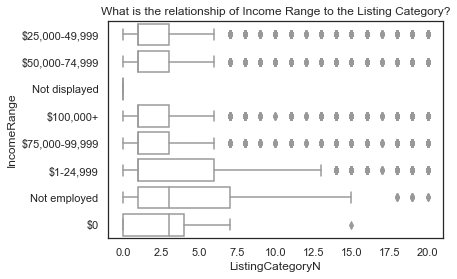

In [73]:
sb.boxplot(data=Loan, y='IncomeRange', x='ListingCategoryN', color = 'white')
plt.title("What is the relationship of Income Range to the Listing Category?");